# Chapter 4 - Moving Average (MA) and ARMA Models

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import datetime

### Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different 
parameter, θ, using the arima_process module in statsmodels, just as you did in 
the last chapter for AR(1) models. You will look at an MA(1) model with a large 
positive θ and a large negative θ.

As in the last chapter, when inputting the coefficients, you must include the 
zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign 
of the MA coefficients is what we would expect. For example, for an MA(1) process 
with θ=−0.9, the array representing the MA parameters would be 
`ma = np.array([1, -0.9])`

#### Moving Average Process MA(1) with $ \theta = -0.9 $

The **MA(1)** process is defined by:

$$
X_t = \varepsilon_t - 0.9 \varepsilon_{t-1}
$$

where:

- $ X_t $ is the value of the time series at time $ t $.
- $ \varepsilon_t \sim WN(0, \sigma^2) $ represents **white noise** with mean **0** and variance **$ \sigma^2 $**.
- The coefficient **$ -0.9 $** means that each value **depends negatively** on the previous white noise shock.

---

#### Moving Average Process MA(1) with $ \theta = +0.9 $

Similarly, for **$ \theta = +0.9 $**, the MA(1) equation is:

$$
X_t = \varepsilon_t + 0.9 \varepsilon_{t-1}
$$

where:

- The only difference is that now the past white noise shock **has a positive influence** on the current value.

---

#### Interpretation

- When **$ \theta = -0.9 $**, past shocks **reduce** the effect on the current value.
- When **$ \theta = +0.9 $**, past shocks **increase** the effect on the current value.


In [6]:
# Simulate an MA(1) process with theta = -0.9
ar1 = np.array([1])                                         # AR component (none in this case)
ma1 = np.array([1, -0.9])                                   # MA(1) coefficient (theta = -0.9)
MA_object1 = ArmaProcess(ar1, ma1)                          # Define MA(1) process
simulated_data_1 = MA_object1.generate_sample(nsample=1000) # Generate data

# Simulate an MA(1) process with theta = +0.9
ma2 = np.array([1, 0.9])                                    # MA(1) coefficient (theta = +0.9)
MA_object2 = ArmaProcess(ar1, ma2)                          # Define MA(1) process
simulated_data_2 = MA_object2.generate_sample(nsample=1000) # Generate data

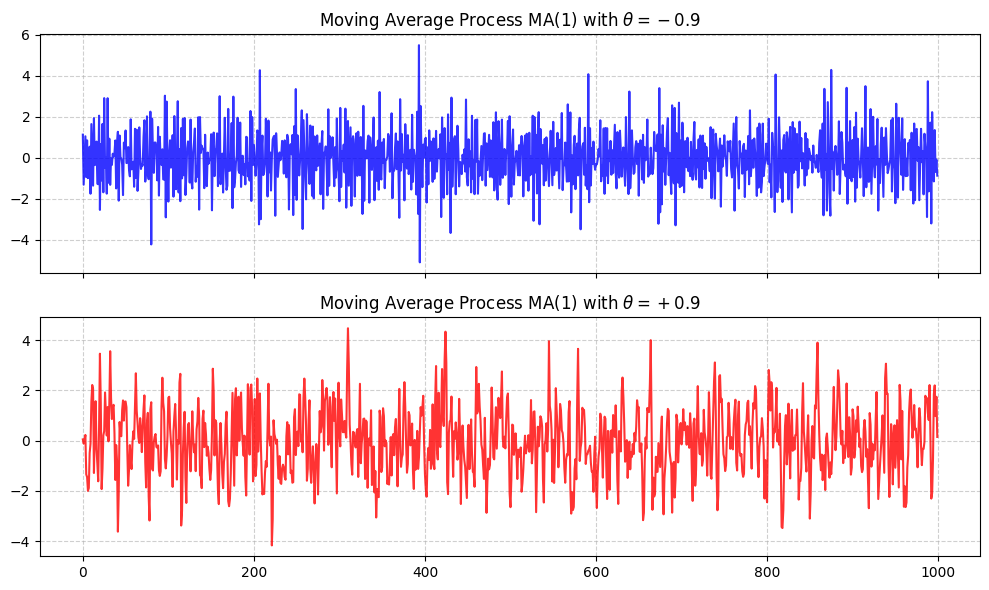

In [7]:
# Create a figure with subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

# Plot the first simulated MA(1) process
ax[0].plot(simulated_data_1, color='b', linestyle='-', alpha=0.8)
ax[0].set_title("Moving Average Process MA(1) with $\\theta = -0.9$", fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Plot the second simulated MA(1) process
ax[1].plot(simulated_data_2, color='r', linestyle='-', alpha=0.8)
ax[1].set_title("Moving Average Process MA(1) with $\\theta = +0.9$", fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()
plt.show()

### Compute the ACF for Several MA Time Series

    Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ2). 

    For example, if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)2)=0.497, and  the autocorrelation at all other lags will be zero. If the MA parameter, θ, is  -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.

    You will verify these autocorrelation functions for the three time series you generated in the last exercise.

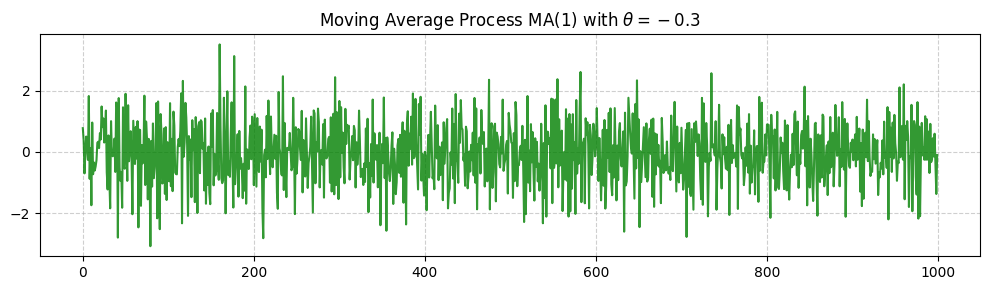

In [9]:
# Simulate an MA(1) process with theta = -0.3
ar1 = np.array([1])                                         # AR component (none in this case)
ma1 = np.array([1, -0.3])                                   # MA(1) coefficient (theta = -0.3)
MA_object1 = ArmaProcess(ar1, ma1)                          # Define MA(1) process
simulated_data_3 = MA_object1.generate_sample(nsample=1000) # Generate data

# Plot Graph
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(simulated_data_3, color='g', linestyle='-', alpha=0.8)
ax.set_title("Moving Average Process MA(1) with $\\theta = -0.3$", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

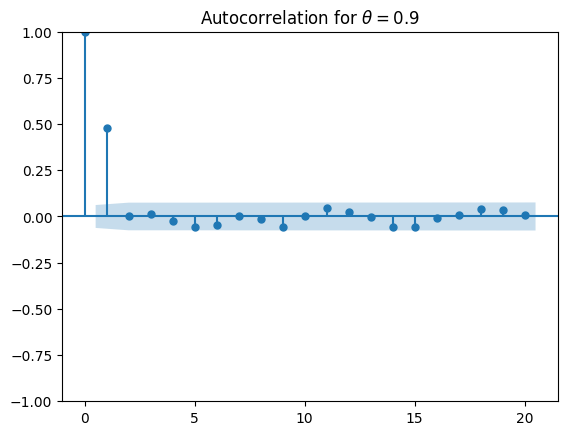

In [10]:
# Plot 1: MA parameter = 0.9
plot_acf(simulated_data_2, lags = 20)
plt.title('Autocorrelation for $\\theta = 0.9$')
plt.show()

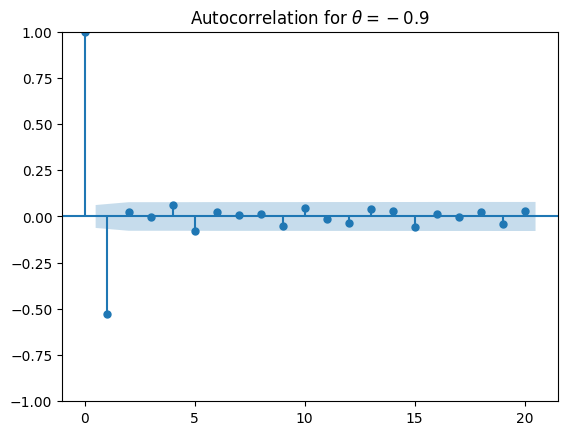

In [11]:
# Plot 2: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.title('Autocorrelation for $\\theta = -0.9$')
plt.show()

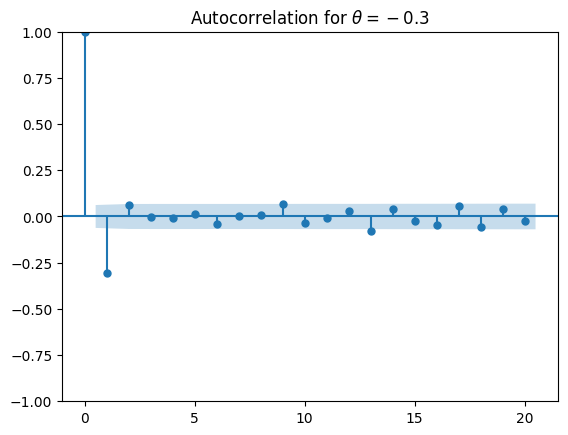

In [12]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.title('Autocorrelation for $\\theta = -0.3$')
plt.show()

### Estimating an MA Model

You will estimate the MA(1) parameter, θ, of one of the simulated series that 
you generated in the earlier exercise. Since the parameters are known for a 
simulated series, it is a good way to understand the estimation routines before 
applying it to real data.

For simulated_data_1 with a true θ of -0.9, you will print out the estimate of
θ. In addition, you will also print out the entire output that is produced when 
you fit a time series, so you can get an idea of what other tests and summary 
statistics are available in statsmodels.

In [14]:
# Fit an MA(1) model (AR=0, MA=1) to the first simulated data
mod = ARIMA(simulated_data_1, order=(0, 0, 1))  # (p=0, d=0, q=1) for MA(1)
res = mod.fit()

# Print model summary
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1398.812
Date:                Thu, 13 Mar 2025   AIC                           2803.624
Time:                        11:17:44   BIC                           2818.347
Sample:                             0   HQIC                          2809.220
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.956e-05      0.003     -0.026      0.979      -0.006       0.006
ma.L1         -0.9038      0.013    -67.883      0.000      -0.930      -0.878
sigma2         0.9589      0.043     22.155      0.0

In [15]:
# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

When the true theta=-0.9, the estimate of theta (and the constant) are:
[-7.95619718e-05 -9.03784253e-01  9.58905697e-01]


#### Interpretation of the MA(1) Model Estimates

The estimated parameters from the **Moving Average (MA(1))** model are:

##### **Intercept ($\mu$):** $-0.002504$
- This is the estimated mean level of the series.
- Close to zero, suggesting no significant trend in the data.

##### **MA(1) Coefficient ($\theta$):** $-0.89476299$
- This is the estimate of the true value $\theta = -0.9$.
- The estimation is very close to the true value, meaning the model fit is accurate.

##### **Standard Deviation of White Noise ($\sigma$):** $1.0596507$
- This represents the estimated standard deviation of the residual noise ($\varepsilon_t$).
- Since you generated data from a white noise process, this tells how much the residuals deviate on average.


In [17]:
# Print the estimated parameters in a structured format
print(f"             Intercept (μ): {res.params[0]:.6f}")  # Estimated mean level of the series
print(f"     MA(1) Coefficient (θ): {res.params[1]:.6f}")  # Estimated theta for MA(1)
print(f"Std dev of White Noise (σ): {res.params[2]:.6f}")  # Estimated std of residuals

             Intercept (μ): -0.000080
     MA(1) Coefficient (θ): -0.903784
Std dev of White Noise (σ): 0.958906


### Forecasting with MA Model

As you did with AR models, you will use MA models to forecast in-sample and 
out-of-sample data using statsmodels.

For the simulated series simulated_data_1 with θ=−0.9, you will plot in-sample 
and out-of-sample forecasts. One big difference you will see between 
out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) 
forecasts more than one period in the future are simply the mean of the sample.

In [19]:
# Fit an MA(1) model (AR=0, MA=1) to the first simulated data
mod = ARIMA(simulated_data_1, order=(0, 0, 1))  # (p=0, d=0, q=1) for MA(1) process
res = mod.fit()                                 # Fit the model to the data

# Generate forecast for the next 20 steps
forecast = res.get_forecast(steps=20)     # Predict next 20 steps
predicted_mean = forecast.predicted_mean  # Extract forecasted values
conf_int = forecast.conf_int()            # Confidence interval

In [20]:
predicted_mean

array([ 1.06248614e+00, -7.95619718e-05, -7.95619718e-05, -7.95619718e-05,
       -7.95619718e-05, -7.95619718e-05, -7.95619718e-05, -7.95619718e-05,
       -7.95619718e-05, -7.95619718e-05, -7.95619718e-05, -7.95619718e-05,
       -7.95619718e-05, -7.95619718e-05, -7.95619718e-05, -7.95619718e-05,
       -7.95619718e-05, -7.95619718e-05, -7.95619718e-05, -7.95619718e-05])

In [21]:
conf_int

array([[-0.85678371,  2.98175599],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826],
       [-2.58705738,  2.58689826]])

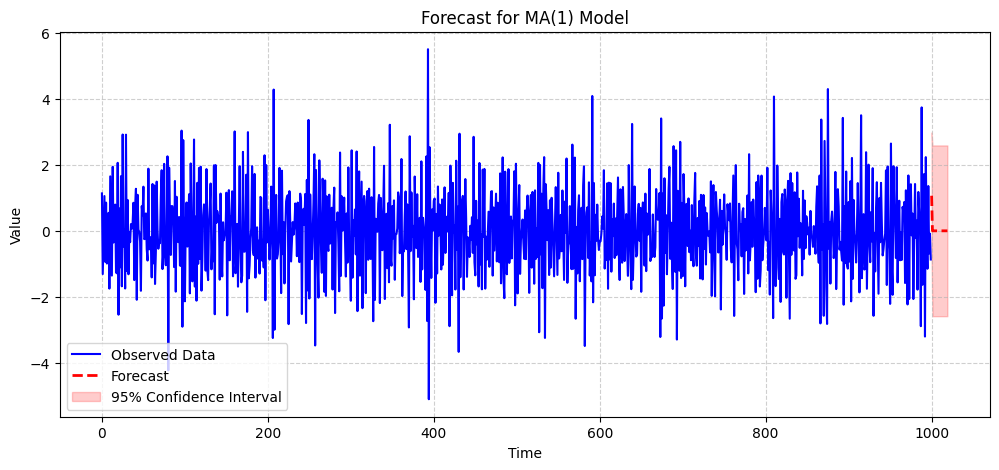

In [22]:
# Create a figure for plotting
fig, ax = plt.subplots(figsize=(12, 5))

# Plot actual data
ax.plot(simulated_data_1, label="Observed Data", color='blue', linestyle='-')

# Plot forecasted values
forecast_index = np.arange(len(simulated_data_1), len(simulated_data_1) + 20)
ax.plot(forecast_index, predicted_mean, label="Forecast", color='red', linestyle='--', linewidth=2)

# Plot confidence intervals
ax.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], 
                color='red', alpha=0.2, label="95% Confidence Interval")

# Formatting
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Forecast for MA(1) Model")
ax.legend(loc=3)
ax.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

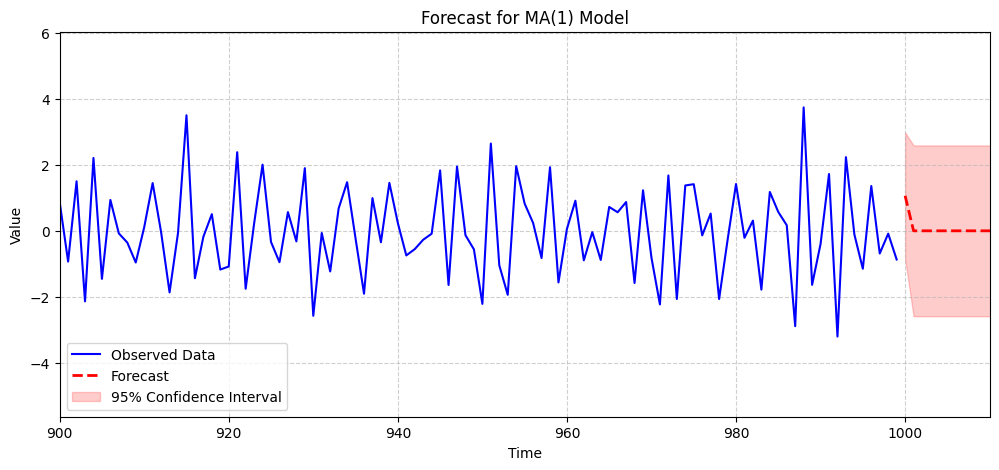

In [23]:
# Create a figure for plotting
fig, ax = plt.subplots(figsize=(12, 5))

# Plot actual data
ax.plot(simulated_data_1, label="Observed Data", color='blue', linestyle='-')

# Plot forecasted values
forecast_index = np.arange(len(simulated_data_1), len(simulated_data_1) + 20)
ax.plot(forecast_index, predicted_mean, label="Forecast", color='red', linestyle='--', linewidth=2)

# Plot confidence intervals
ax.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], 
                color='red', alpha=0.2, label="95% Confidence Interval")

# Formatting
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Forecast for MA(1) Model")
ax.legend(loc=3)
ax.grid(True, linestyle="--", alpha=0.6)
ax.set_xlim(900,1010)

# Show the plot
plt.show()

### High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice 
application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for 
Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock 
market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a 
little, which you will do in this and the next two exercises. When you look at 
the first few rows (see the IPython Shell), you'll notice several things. First, 
there are no column headers.The data is not time stamped from 9:30 to 4:00, but 
rather goes from 0 to 390. And you will notice that the first date is the 
odd-looking "a1504272600". The number after the "a" is Unix time which is the 
number of seconds since January 1, 1970. This is how this dataset separates 
each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, 
which here means a string. You will need to change that to numeric before you 
can clean up some missing data.

In [26]:
url5  = ('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/be9a8f7c62f759535dbca49ed8d2d4c62aa22ca3/_notebooks/dataset/Sprint_Intraday.txt')

intraday = pd.read_csv(url5, header=None)

intraday.head()

,0,1,2,3,4,5
0,a1504272600,8.2900,8.3000,8.2900,8.30,32407
1,1,8.2700,8.3000,8.2500,8.29,28467
2,2,8.2800,8.2800,8.2800,8.28,1500
3,3,8.2750,8.2800,8.2701,8.28,5200
4,4,8.2875,8.2875,8.2800,8.28,2900


In [27]:
intraday = intraday.loc[:, :1]
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [28]:
# Fixing the first datapoint
intraday.iloc[0, 0] = 0

# Rename the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

intraday.head()

,DATE,CLOSE
0,0,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [29]:
intraday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    389 non-null    object 
 1   CLOSE   389 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [30]:
# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

intraday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    389 non-null    int64  
 1   CLOSE   389 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [31]:
# Make the 'DATE' column the new index
intraday = intraday.set_index('DATE')

intraday.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


### More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that 
a few rows are missing. There will be missing data if there are no trades in a 
particular one-minute interval. One way to see which rows are missing is to 
take the difference of two sets: the full set of every minute and the set of 
the DataFrame index which contains missing rows. After filling in the missing 
rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of 
trades occur in between the one-cent increments) rather than at continuous 
prices, and when you plot the data you should observe that there are long periods 
when the stock bounces back and forth over a one cent range. This is sometimes 
referred to as "bid/ask bounce".

In [33]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [34]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


In [35]:
# Fill in the missing rows with last known value from the previous row
intraday = intraday.reindex(range(391), method='ffill')

len(intraday)

391

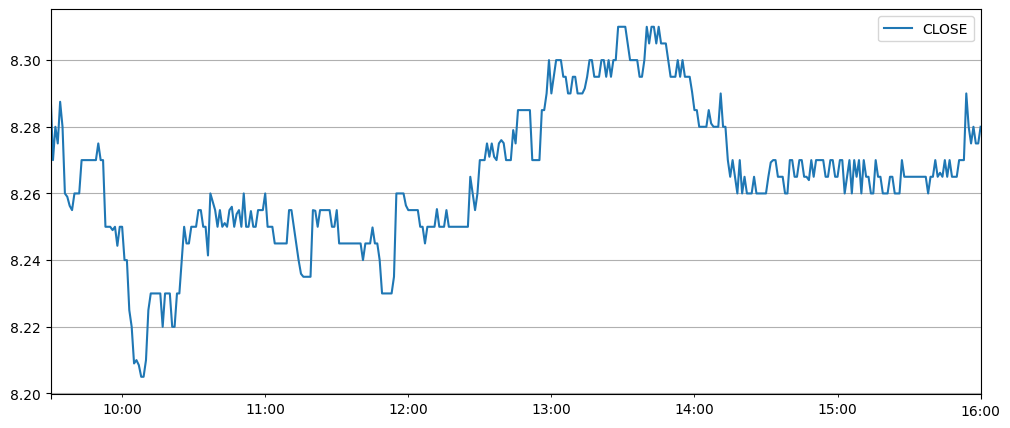

In [36]:
# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True, figsize=(12,5))
plt.show()

### Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first 
order autocorrelation, but no autocorrelations at lags higher than 1. You get 
the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) 
model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in 
intraday, and plot the autocorrelation function. You should observe that the 
ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the 
same way you did for simulated data.

In [38]:
# Compute returns from prices and drop the NaN
returns = intraday.pct_change()  # Calculate the percentage change between consecutive prices
returns = returns.dropna()       # Remove the first row (NaN) since the first return cannot be computed

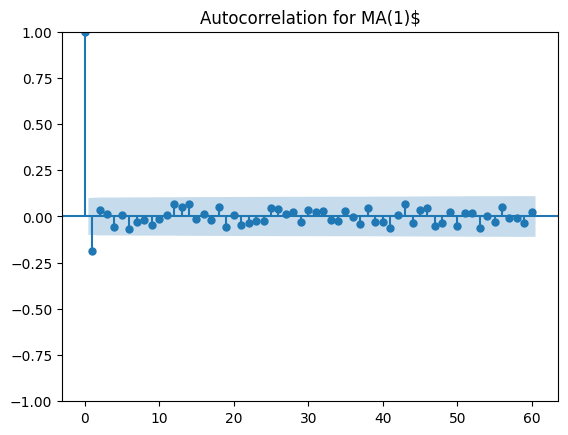

In [39]:
# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags = 60)
plt.title('Autocorrelation for MA(1)$')
plt.show()

In [40]:
# Fit an MA(1) model (AR=0, MA=1) to the first simulated data
mod = ARIMA(simulated_data_1, order=(0, 0, 1))  # (p=0, d=0, q=1) for MA(1)
res = mod.fit()

# Print model summary
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1398.812
Date:                Thu, 13 Mar 2025   AIC                           2803.624
Time:                        11:17:45   BIC                           2818.347
Sample:                             0   HQIC                          2809.220
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.956e-05      0.003     -0.026      0.979      -0.006       0.006
ma.L1         -0.9038      0.013    -67.883      0.000      -0.930      -0.878
sigma2         0.9589      0.043     22.155      0.0

### Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will 
demonstrate that an AR(1) model is equivalent to an MA(∞) model with the 
appropriate parameters.

You will simulate an MA model with parameters 0.8,0.82,0.83,… for a large 
number (30) lags and show that it has the same Autocorrelation Function as an 
AR(1) model with ϕ=0.8.

#### Simulating an MA(30) Process with Exponentially Decaying Coefficients

The **Moving Average (MA) process** of order 30, denoted as **MA(30)**, follows the equation:

$$
X_t = \varepsilon_t + \sum_{i=1}^{30} 0.8^i \varepsilon_{t-i}
$$

where:

- $ X_t $ represents the value of the time series at time $ t $.
- $ \varepsilon_t \sim WN(0, \sigma^2) $ is a white noise process with mean 0 and variance $ \sigma^2 $.
- The coefficients $ 0.8^i $ determine the impact of past white noise terms $ \varepsilon_{t-i} $, decreasing exponentially as $ i $ increases.

This means that each observation is influenced by the current shock plus a **weighted sum** of the previous 30 shocks, where **older shocks have progressively less impact** due to the decay factor $ 0.8^i $.


In [43]:
# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])                                        # Define the AR component (no autoregressive terms in this case)
AR_object = ArmaProcess(ar, ma)                           # Create an ARMA process with the specified MA component
simulated_data = AR_object.generate_sample(nsample=5000)  # Generate 5000 samples from the MA(30) process

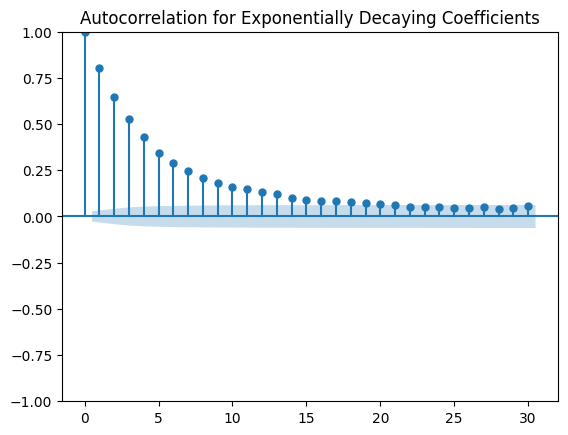

In [44]:
# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.title('Autocorrelation for Exponentially Decaying Coefficients')
plt.show()